In [17]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
import pickle
import json
import matplotlib.pyplot as plt
import seaborn as sns  


In [18]:
# Load data after preprocessing
data = pd.read_csv('data/data_ready.csv')

In [19]:
# Select all features except the target feature
X = data.drop('price', axis=1)
y = data['price']

# Split the data into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [20]:
# Define the model - change to DecisionTreeRegressor
decision_tree_regressor = DecisionTreeRegressor()

# Define the hyperparameter grid
hyper_param_grid = {'max_depth': [3, 5, 7]}

# Create the grid search object
grid_search = GridSearchCV(estimator=decision_tree_regressor, param_grid=hyper_param_grid, cv=5)


In [21]:
# Fit the grid search object to the training data
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [3, 5, 7]})

In [22]:
# Get the best model
best_model = grid_search.best_estimator_

# Get the best hyperparameters
best_params = grid_search.best_params_

# Get the best mean cross-validated score
best_score = grid_search.best_score_

# Get the evaluation results for all the parameter combinations
cv_results = grid_search.cv_results_

# Evaluate the model on the test data
test_score = best_model.score(X_test, y_test)

In [23]:
# Pickle the best model for future use
pickle.dump(best_model, open('./pkls/decision_tree_model.pkl', 'wb'))


In [24]:
model_metadata = {
    'Data Shape Used': data.shape,
    'Model Params': best_params,
    'Train Score': best_score,
    'Test Score': test_score
}

In [25]:
# Save the metadata to a file
with open("./metadata/gradient_metadata.txt", 'w') as f: 
    f.write(json.dumps(model_metadata, indent=4))

/var/folders/wf/1gld151d1xj9kj9jz1szt28h0000gn/T/ipykernel_27335/3492309030.py:9: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='Actual', y='Predicted', data=result_df, palette='viridis', edgecolor='w', alpha=0.7)


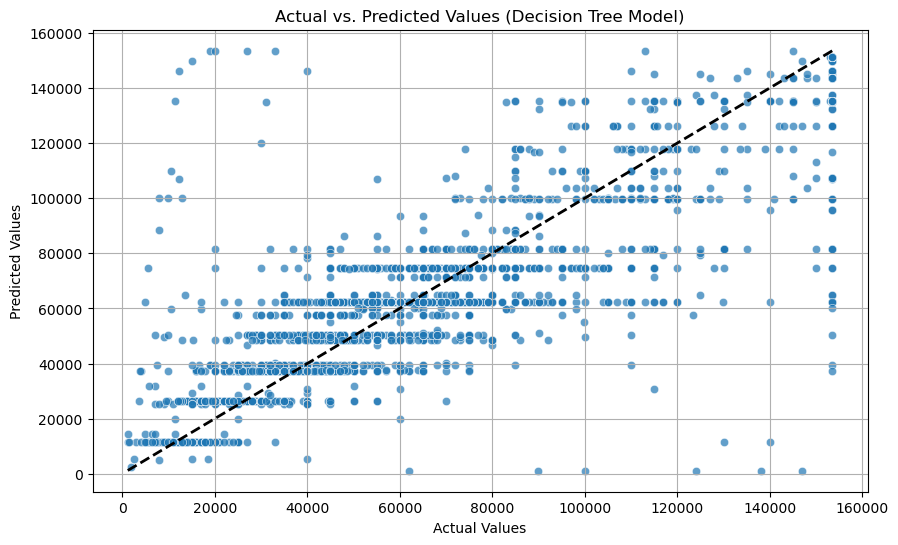

In [26]:
# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Create a DataFrame for easy plotting
result_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Actual', y='Predicted', data=result_df, palette='viridis', edgecolor='w', alpha=0.7)

# Add a diagonal line for reference (perfect prediction)
plt.plot([result_df['Actual'].min(), result_df['Actual'].max()],
         [result_df['Actual'].min(), result_df['Actual'].max()],
         'k--', lw=2)

# Customize plot
plt.title('Actual vs. Predicted Values (Decision Tree Model)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.show()